# Titanic competition with TensorFlow Decision Forests

The Titanic - Machine Learning from Disaster competition is well-known in the Kaggle community to practice machine learning basics so I wanted to try my hand at it. The data is divided into two files: train and test. In the *train* file, a column *Survival* shows whether the passenger survived (**1**) or not (**0**).

## Data Dictionary
<table align="left">
    <tr>
        <th>Variable</th>
        <th>Definition</th>
        <th>Key</th>
    </tr>
    <tr>
        <td>Survival</td>
        <td>Survival</td>
        <td>0 = No, 1 = Yes</td>
    </tr>
    <tr>
        <td>Pclass</td>
        <td>Ticket class</td>
        <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
    </tr>
    <tr>
        <td>Sex</td>
        <td>Sex</td>
        <td></td>
    </tr>
    <tr>
        <td>Age</td>
        <td>Age in years</td>
        <td></td>
    </tr>
    <tr>
        <td>Sibsp</td>
        <td># of siblings / spouses aboard the Titanic</td>
        <td></td>
    </tr>
    <tr>
        <td>Parch</td>
        <td># of parents / children aboard the Titanic</td>
        <td></td>
    </tr>
    <tr>
        <td>Ticket</td>
        <td>Ticket number</td>
        <td></td>
    </tr>
    <tr>
        <td>Fare</td>
        <td>Passenger fare</td>
        <td></td>
    </tr>
    <tr>
        <td>Cabin</td>
        <td>Cabin number</td>
        <td></td>
    </tr>
    <tr>
        <td>Embarked</td>
        <td>Port of Embarkation</td>
        <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
</table>

## Import Dependencies

In [3]:
# Importing packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
import matplotlib.pyplot as plt

# classifier models
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

sns.set_style("whitegrid")
sns.set_palette("Set2")

## Data Exploration

In [5]:
train_data = pd.read_csv(r"C:\Users\User\Portfolio Projects\Kaggle\Titanic\train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data = pd.read_csv(r"C:\Users\User\Portfolio Projects\Kaggle\Titanic\test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
test_data.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


Looking at the table above, there are four columns (Age, Fare, Cabin, and Embarked) that are missing values. Using the information that I have, I will just have to fill the missing values through imputation.

### Pclass

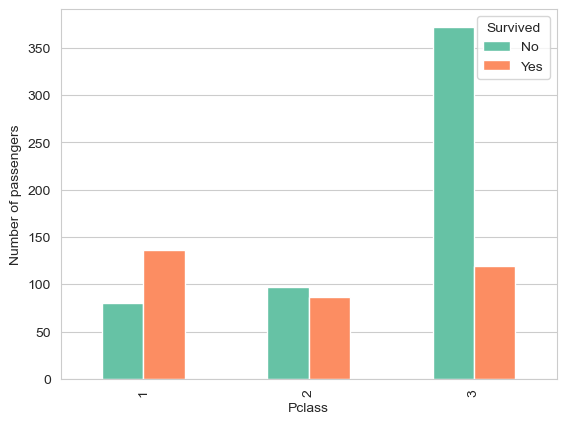

In [12]:
ax = train_data.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar')

ax.set_ylabel("Number of passengers")
ax.legend(['No', 'Yes'], title='Survived')
ax.grid(axis='x', visible=False)

plt.show()

Looking at the bar chart, it's evident that passengers who paid for more expensive tickets had a higher survival rate, likely because they stayed on higher decks with better access to lifeboats. I don't need to change anything to this column.

### Name

I noticed that there are three kinds of passengers: commonfolk, officers/crewmembers, and royalty. Since there a lot of titles found in the data, I figured I can use each passenger's *Title* to estimate their age. For example, if a passenger has the title of *Ms*, I will give them the median age value for all other passengers with the same title.

#### Extracting the title from *Name*

In [16]:
# Create new Title column
train_data['Title'] = train_data['Name'].str.extract(r' ([a-zA-Z]+)\.', expand=True)
test_data['Title'] = test_data['Name'].str.extract(r' ([a-zA-Z]+)\.', expand=True)

train_data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [17]:
# Replacing all titles with mr, mrs, miss, master, officer, royalty
def replace_titles(x):
    title=x['Title']
    if title in ['Major', 'Col', 'Capt', 'Dr', 'Rev']:
        return 'Officer'
    elif title in ['Jonkheer', 'Don', 'Sir', 'Countess', 'Dona', 'Lady']:
        return 'Royalty'
    elif title in ['Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    else:
        return title

train_data['Title']=train_data.apply(replace_titles, axis=1)
test_data['Title']=train_data.apply(replace_titles, axis=1)

In [18]:
# Confirm that we are left with just six values
train_data['Title'].value_counts()

Title
Mr         517
Miss       185
Mrs        126
Master      40
Officer     18
Royalty      5
Name: count, dtype: int64

### Age

Using the median of the *Title* group, I can now impute the age using the median age for all people with the same sex, title, and pclass.

In [20]:
# Grouping by Sex, Pclass, and Title 
train_grouped = train_data.groupby(['Sex','Pclass', 'Title'])
test_grouped = test_data.groupby(['Sex','Pclass', 'Title'])

# Viewing the median Age by the grouped features 
print(train_data.groupby(['Sex', 'Pclass', 'Title', ])['Age'].median())

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    40.5
        2       Miss       24.0
                Mrs        32.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64


In [21]:
# Replacing all missing ages with the value in this column
train_data['Age'] = train_grouped['Age'].transform(lambda x: x.fillna(x.median()))
test_data['Age'] = test_grouped['Age'].transform(lambda x: x.fillna(x.median()))

# Checking if the Age column has any null values left
train_data['Age'].isnull().sum()

0

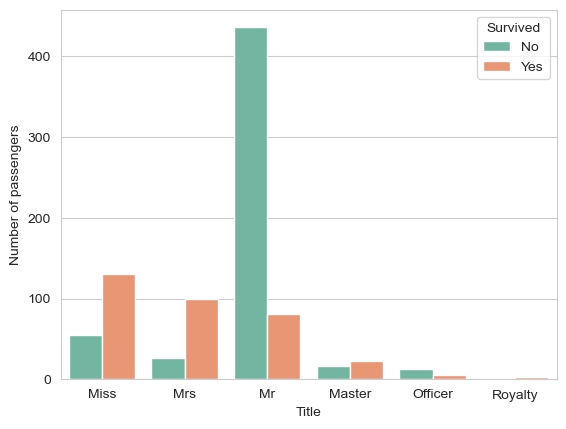

In [22]:
# Sort the data by Title based on the number of survived passengers
sorted_titles = train_data[train_data['Survived'] == 1]['Title'].value_counts().index

# Plot using sns.countplot to directly count the occurrences
ax = sns.countplot(data=train_data, x="Title", hue="Survived", order=sorted_titles)

ax.set_ylabel("Number of passengers")
ax.legend(['No', 'Yes'], title='Survived')
ax.grid(axis='x', visible=False)

plt.show()

It's only reasonable that more women were able to survive the Titanic shipwreck due to the *Birkenhead* drill, or commonly known as the "Women and children first" code of conduct. Since priority was given to women and children, the highest number of non-survivors were men.

It is interesting to see that passengers who were masters (typically young boys) or officers had a few survivors. Furthermore, passengers from royalty had an even number of survived and perished individuals. However, this information is not statistically significant due to its small sample size.

### Sex



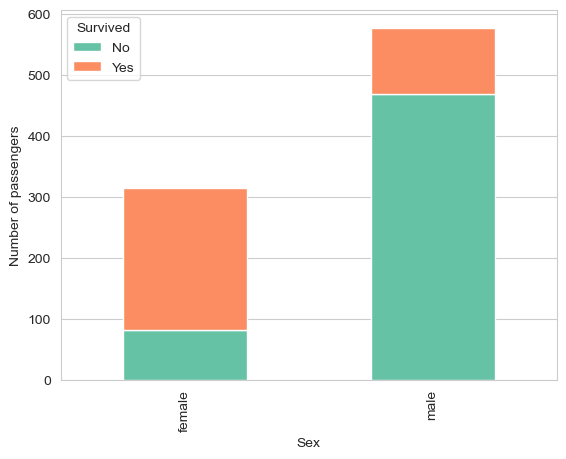

In [25]:
ax = train_data.pivot_table('PassengerId', 'Sex', 'Survived', 'count').plot(kind='bar', stacked=True)

ax.set_ylabel("Number of passengers")
ax.legend(['No', 'Yes'], title='Survived')
ax.grid(axis='x', visible=False)

plt.show()

This bar chart effectively shows the disparity in survival rates between men and women, reinforcing the "women and children first" policy during the evacuation. Therefore, it makes sense to keep the Sex column as it is, since it already highlights a critical insight about the survival dynamics on the Titanic.

### SibSp and Parch

I can use the two variables of Parch and SibSp to create a new variable called Family_Size. This is simply done by adding Parch and SibSp together.

Creating a single feature showing the family size was not working well, so I tried grouping them into single, little, medium, and big families instead.

In [28]:
# create Family_Size column (Parch +)
train_data['Family'] = train_data['Parch'] + train_data['SibSp']
test_data['Family'] = test_data['Parch'] + test_data['SibSp']

In [29]:
train_data.groupby(['Family'])['Survived'].value_counts(normalize=True)

Family  Survived
0       0           0.696462
        1           0.303538
1       1           0.552795
        0           0.447205
2       1           0.578431
        0           0.421569
3       1           0.724138
        0           0.275862
4       0           0.800000
        1           0.200000
5       0           0.863636
        1           0.136364
6       0           0.666667
        1           0.333333
7       0           1.000000
10      0           1.000000
Name: proportion, dtype: float64

In [30]:
def FamilySize(x):
    """
    A function for Family size transformation
    """
    if x == 1 or x == 2:
        return 'little'
    elif x == 3:
        return 'medium'
    elif x >= 5:
        return 'big'
    else:
        return 'single'

train_data['Family'] = train_data['Family'].apply(lambda x : FamilySize(x))
test_data['Family'] = test_data['Family'].apply(lambda x : FamilySize(x))

In [31]:
train_data.groupby(['Pclass', 'Family'])['Survived'].mean()

Pclass  Family
1       big       0.500000
        little    0.734043
        medium    0.714286
        single    0.540541
2       big       1.000000
        little    0.600000
        medium    0.769231
        single    0.352381
3       big       0.095238
        little    0.384615
        medium    0.666667
        single    0.205357
Name: Survived, dtype: float64

### Ticket

At first, I didn't use this feature because I thought it was useless. But I realized I could use the prefix of each ticket.

In [33]:
def Ticket_Prefix(x):
    """
    Function for extracting prefixes. Tickets have length of 1-3.
    """
    l = x.split()
    if len(x.split()) == 3:
        return x.split()[0] + x.split()[1]
    elif len(x.split()) == 2:
        return x.split()[0]
    else:
        return 'None'

train_data['TicketPrefix'] = train_data['Ticket'].apply(lambda x: Ticket_Prefix(x))
test_data['TicketPrefix'] = test_data['Ticket'].apply(lambda x: Ticket_Prefix(x))

In [34]:
#There are many similar prefixes, but combining them doesn't yield a significantly better result.
train_data.TicketPrefix.unique()

array(['A/5', 'PC', 'STON/O2.', 'None', 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'SC/AHBasle',
       'A/4', 'WE/P', 'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2',
       'S.C./PARIS', 'C.A./SOTON'], dtype=object)

### Fare

It only has one missing value, so I will fill it with the median fare value for the passenger's class.

In [36]:
train_data['Age'] = train_data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
test_data['Age'] = test_data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

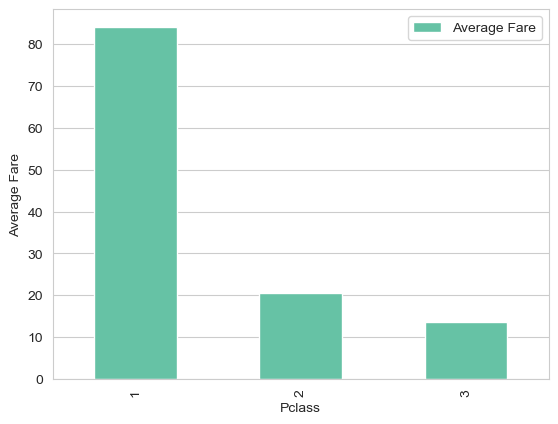

In [37]:
ax = train_data.pivot_table('Fare', 'Pclass').plot(kind='bar')

ax.set_ylabel('Average Fare')
ax.legend(['Average Fare'])
ax.grid(axis='x', visible=False)

plt.show()

### Cabin

There is a lot of missing values under this column. First, I must fill all null values into 'Unknown'. Then, extract the first letter of the cabin which determines the section where the room would have been. It is possible that some cabins were closer to the life boats and thus those that were closer to them may have had a greater chance at securing a spot.

In [39]:
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')
test_data['Cabin'] = test_data['Cabin'].fillna('Unknown')

In [40]:
# map first letter of cabin to itself
train_data['Cabin'] = train_data['Cabin'].map(lambda x: x[0])
test_data['Cabin'] = test_data['Cabin'].map(lambda x: x[0])

In [41]:
train_data.groupby('Cabin').agg({'Survived': ['mean']})

,Survived
,mean
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


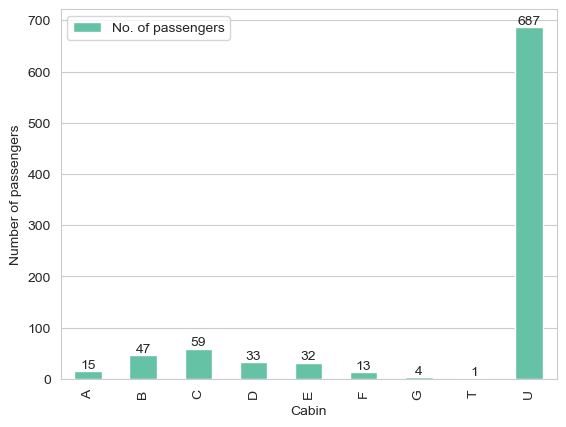

In [42]:
# ax = train_data.pivot_table('PassengerId', 'Cabin', 'Survived', 'count').sort_values(by=1, ascending=False).plot(kind='bar', stactrain_data.pivot_table('PassengerId', 'Cabin')ked=True)
ax = train_data.pivot_table('PassengerId', 'Cabin', aggfunc='count').plot(kind='bar')

ax.set_ylabel("Number of passengers")
ax.legend(['No. of passengers'])
ax.grid(axis='x', visible=False)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')  # You can use 'center', 'edge', or 'center' based on label position

plt.show()

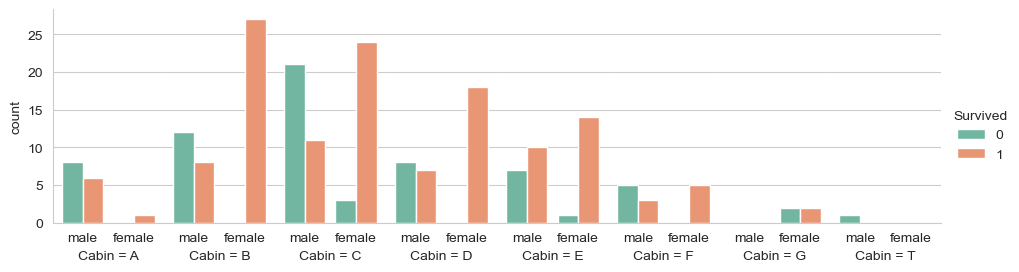

In [43]:
# For passengers with known Cabins, the survival rate varies.
g = sns.catplot(x="Sex", hue="Survived", col="Cabin",
                data=train_data[train_data['Cabin'] != 'U'],
                kind="count", height=3, aspect=.4,
                order=train_data['Sex'].unique(),  # Keep the order of 'Sex' unchanged
                col_order=sorted(train_data[train_data['Cabin'] != 'U']['Cabin'].unique()))  # Alphabetical order of cabins)

for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
    ax.margins(x=0.1) # slightly more margin as a separation
    
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)
plt.show()

Looking at the deck plan below, flooding began at the Tank Top, where the forepeak tank, cargo holds, and boiler rooms were located. Some women in the lower decks had perished, perhaps they were not able to make it towards the top deck?

Notably, Cabins B, C, and E has a high survivability rate than the other cabins. This might be where most of the women were staying at the time before the iceberg collision.

<div>
    <center><img src="https://www.titanicandco.com/titanic/images/deckplan1.jpg" width="500"/></center>
</div>


### Embarked

There are only two missing values in the Embarked column. I will just use the Pandas 'bfill' method.

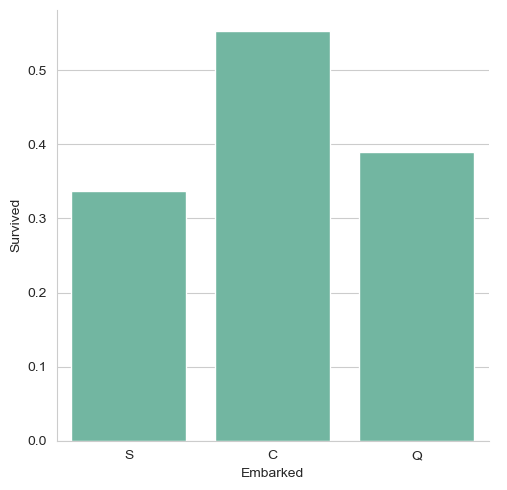

In [46]:
sns.catplot(x='Embarked', y='Survived', data=train_data,
            kind='bar', errorbar=None)
plt.show()

In [47]:
train_data['Embarked'] = train_data['Embarked'].bfill()
test_data['Embarked'] = test_data['Embarked'].bfill()

In [48]:
# Checking if the Embarked column has any null values left
train_data['Embarked'].isnull().sum()

0

## Data Preparation

In [50]:
# Checking what the data looks like currently
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,TicketPrefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,little,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,little,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,single,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,little,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,single,None


In [51]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,TicketPrefix
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891,891,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,9,3,6,4,43
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,U,S,Mr,single,None
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,687,645,517,552,665
mean,446.000000,0.383838,2.308642,NaN,NaN,29.138238,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.495175,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,26.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,36.750000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,NaN,NaN


The last step to perform before I can begin modeling is convert all the categorical features to numbers, as the algorithms can only take an array of numbers as an input, not names or letters. I will use the pd.get_dummies() method from Pandas that converts categorical features into dummy variables.

In [53]:
#Drop unnecessary columns
to_drop = ['Ticket', 'Name', 'SibSp', 'Parch']
for i in to_drop:
    train_data.drop([i], axis=1, inplace=True)
    test_data.drop([i], axis=1, inplace=True)

In [54]:
# Pclass in fact is a categorical variable, though it's type isn't object.
for col in train_data.columns:
    if train_data[col].dtype == 'object' or col == 'Pclass':
        dummies = pd.get_dummies(train_data[col], drop_first=False)
        dummies = dummies.add_prefix('{}_'.format(col))
        train_data.drop(col, axis=1, inplace=True)
        train_data = train_data.join(dummies)
        
for col in test_data.columns:
    if test_data[col].dtype == 'object' or col == 'Pclass':
        dummies = pd.get_dummies(test_data[col], drop_first=False)
        dummies = dummies.add_prefix('{}_'.format(col))
        test_data.drop(col, axis=1, inplace=True)
        test_data = test_data.join(dummies)

In [55]:
# This is how the data looks like now.
pd.set_option('display.max_columns', None)
train_data.head()

,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Family_big,Family_little,Family_medium,Family_single,TicketPrefix_A./5.,TicketPrefix_A.5.,TicketPrefix_A/4,TicketPrefix_A/4.,TicketPrefix_A/5,TicketPrefix_A/5.,TicketPrefix_A/S,TicketPrefix_A4.,TicketPrefix_C,TicketPrefix_C.A.,TicketPrefix_C.A./SOTON,TicketPrefix_CA,TicketPrefix_CA.,TicketPrefix_F.C.,TicketPrefix_F.C.C.,TicketPrefix_Fa,TicketPrefix_None,TicketPrefix_P/PP,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_S.C./A.4.,TicketPrefix_S.C./PARIS,TicketPrefix_S.O./P.P.,TicketPrefix_S.O.C.,TicketPrefix_S.O.P.,TicketPrefix_S.P.,TicketPrefix_S.W./PP,TicketPrefix_SC,TicketPrefix_SC/AH,TicketPrefix_SC/AHBasle,TicketPrefix_SC/PARIS,TicketPrefix_SC/Paris,TicketPrefix_SCO/W,TicketPrefix_SO/C,TicketPrefix_SOTON/O.Q.,TicketPrefix_SOTON/O2,TicketPrefix_SOTON/OQ,TicketPrefix_STON/O2.,TicketPrefix_SW/PP,TicketPrefix_W./C.,TicketPrefix_W.E.P.,TicketPrefix_W/C,TicketPrefix_WE/P
0,1,0,22.0,7.2500,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,1,38.0,71.2833,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,1,26.0,7.9250,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,4,1,35.0,53.1000,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,0,35.0,8.0500,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
test_data.head()

,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Family_big,Family_little,Family_medium,Family_single,TicketPrefix_A./5.,TicketPrefix_A.2.,TicketPrefix_A.5.,TicketPrefix_A/4,TicketPrefix_A/5,TicketPrefix_A/5.,TicketPrefix_AQ/3.,TicketPrefix_AQ/4,TicketPrefix_C,TicketPrefix_C.A.,TicketPrefix_CA,TicketPrefix_CA.,TicketPrefix_F.C.,TicketPrefix_F.C.C.,TicketPrefix_LP,TicketPrefix_None,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_S.C./PARIS,TicketPrefix_S.O./P.P.,TicketPrefix_S.O.C.,TicketPrefix_SC,TicketPrefix_SC/A.3,TicketPrefix_SC/A4,TicketPrefix_SC/AH,TicketPrefix_SC/PARIS,TicketPrefix_SC/Paris,TicketPrefix_SOTON/O.Q.,TicketPrefix_SOTON/O2,TicketPrefix_SOTON/OQ,TicketPrefix_STON/O2.,TicketPrefix_STON/OQ.,TicketPrefix_W./C.,TicketPrefix_W.E.P.
0,892,34.5,7.8292,False,False,True,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,893,47.0,7.0000,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,894,62.0,9.6875,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,895,27.0,8.6625,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,896,22.0,12.2875,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
# Preparing the data
X_train = train_data.drop('Survived', axis=1)
Y_train = train_data['Survived']
X_test  = test_data

For feature selection, this code ranks features by their importance for Random Forest. At first for parameters I used "n_estimators = 200" then I used more optimal parameters, which were found lower.

In [59]:
# Training the RandomForest model
clf = RandomForestClassifier(n_estimators = 15,
                                criterion = 'gini',
                                max_features = 'sqrt',
                                max_depth = None,                                
                                min_samples_split = 7,
                                min_weight_fraction_leaf = 0.0,
                                max_leaf_nodes = 18)
clf.fit(X_train, Y_train)

# Printing feature importance ranking
indices = np.argsort(clf.feature_importances_)[::-1]
print('Feature ranking:')
for f in range(X_train.shape[1]):
    print('%d. feature %d %s (%f)' % (f + 1, indices[f], X_train.columns[indices[f]], clf.feature_importances_[indices[f]]))

Feature ranking:
1. feature 22 Title_Mr (0.204448)
2. feature 7 Sex_male (0.178889)
3. feature 6 Sex_female (0.115855)
4. feature 5 Pclass_3 (0.085898)
5. feature 21 Title_Miss (0.058878)
6. feature 16 Cabin_U (0.056227)
7. feature 2 Fare (0.054592)
8. feature 27 Family_little (0.035962)
9. feature 1 Age (0.035891)
10. feature 0 PassengerId (0.034381)
11. feature 3 Pclass_1 (0.017351)
12. feature 19 Embarked_S (0.013330)
13. feature 23 Title_Mrs (0.012587)
14. feature 12 Cabin_E (0.012421)
15. feature 4 Pclass_2 (0.010244)
16. feature 20 Title_Master (0.008541)
17. feature 17 Embarked_C (0.006593)
18. feature 24 Title_Officer (0.006519)
19. feature 69 TicketPrefix_W./C. (0.005810)
20. feature 26 Family_big (0.005663)
21. feature 48 TicketPrefix_PC (0.004651)
22. feature 46 TicketPrefix_None (0.003989)
23. feature 39 TicketPrefix_C.A. (0.002770)
24. feature 11 Cabin_D (0.002731)
25. feature 18 Embarked_Q (0.002723)
26. feature 35 TicketPrefix_A/5. (0.002653)
27. feature 67 TicketPrefix_

In [60]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(X_train)
train_new.shape

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(891, 11)

In [61]:
best_features = X_train.columns[indices[0:train_new.shape[1]]]
X = X_train[best_features]
Xt = X_test[best_features]
best_features

Index(['Title_Mr', 'Sex_male', 'Sex_female', 'Pclass_3', 'Title_Miss',
       'Cabin_U', 'Fare', 'Family_little', 'Age', 'PassengerId', 'Pclass_1'],
      dtype='object')

I wasn't really surprised with the results since most of the features listed are important for determining the survivability of the passengers. But, passengerId is an exception, not sure why it was considered highly.

## Model

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_train, test_size=0.33, random_state=44)

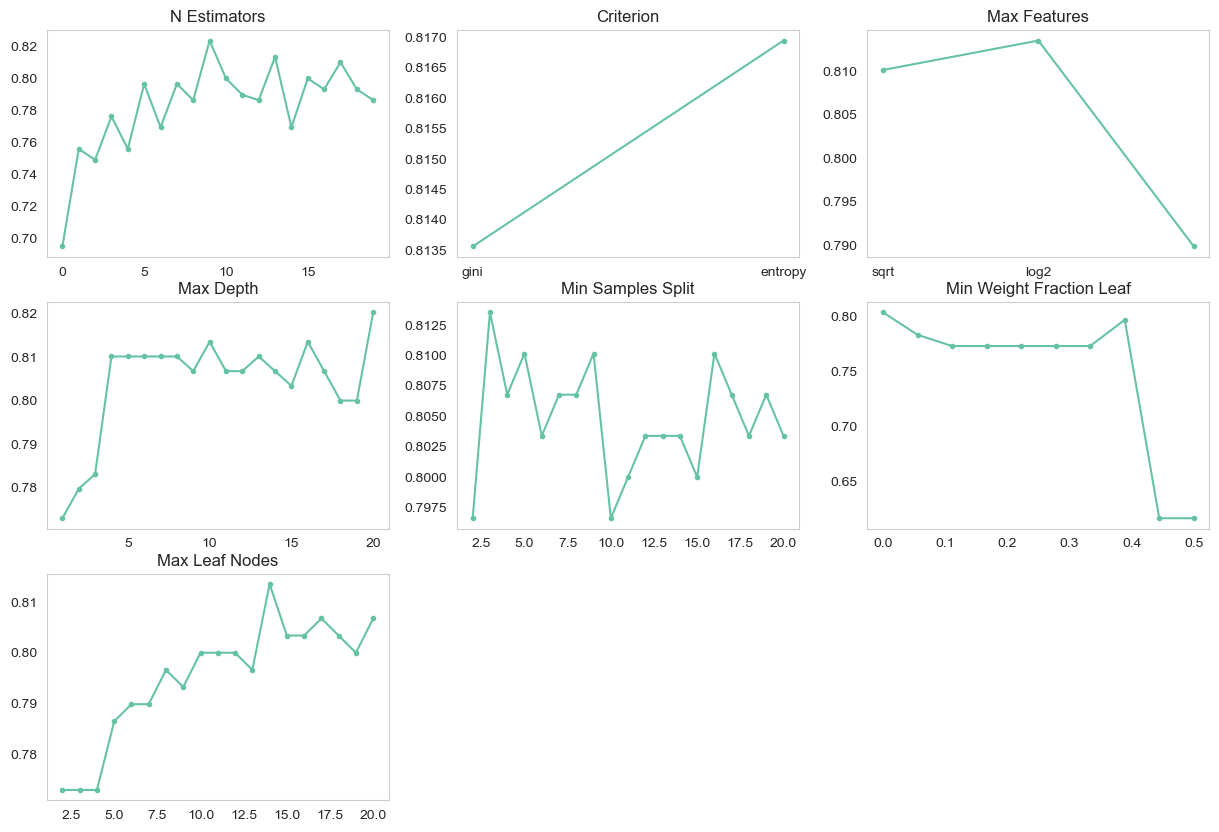

In [65]:
plt.figure(figsize=(15,10))

#N Estimators
plt.subplot(3,3,1)
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(n_estimators=feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('N Estimators')
plt.grid();

#Criterion
plt.subplot(3,3,2)
feature_param = ['gini','entropy']
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(criterion=feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(scores, '.-')
plt.title('Criterion')
plt.xticks(range(len(feature_param)), feature_param)
plt.grid();

#Max Features
plt.subplot(3,3,3)
feature_param = ['sqrt','log2',None]
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_features=feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('Max Features')
plt.xticks(range(len(feature_param)), feature_param)
plt.grid();

#Max Depth
plt.subplot(3,3,4)
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_depth=feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Depth')
plt.grid();

#Min Samples Split
plt.subplot(3,3,5)
feature_param = range(2,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(min_samples_split =feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Min Samples Split')
plt.grid();

#Min Weight Fraction Leaf
plt.subplot(3,3,6)
feature_param = np.linspace(0,0.5,10)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(min_weight_fraction_leaf =feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Min Weight Fraction Leaf')
plt.grid();

#Max Leaf Nodes
plt.subplot(3,3,7)
feature_param = range(2,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_leaf_nodes=feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Leaf Nodes')
plt.grid();

So based on these graphs, I have to tune the model. I made my code based on this [notebook](https://github.com/Erlemar/Erlemar.github.io/blob/master/Notebooks/Titanic.ipynb).

In [67]:
forest = RandomForestClassifier(max_depth = 50,                                
                                min_samples_split = 7,
                                min_weight_fraction_leaf = 0.0,
                                max_leaf_nodes = 18,
                               )

parameter_grid = {'n_estimators' : [15, 100, 200],
                  'criterion' : ['gini', 'entropy'],
                  'max_features' : ['sqrt', 'log2', None]
                 }

grid_search = GridSearchCV(forest, param_grid=parameter_grid, cv=StratifiedKFold(5))
grid_search.fit(X, Y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8159625886636119
Best parameters: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 15}


In [68]:
forest = RandomForestClassifier(n_estimators = 200,
                                criterion = 'gini',
                                max_features = None)
parameter_grid = {
                  'max_depth' : [None, 50],
                  'min_samples_split' : [7, 11, 17],
                  'min_weight_fraction_leaf' : [0.0, 0.2, 0.4],
                  'max_leaf_nodes' : [18, 20],
                 }

grid_search = GridSearchCV(forest, param_grid=parameter_grid, cv=StratifiedKFold(5))
grid_search.fit(X, Y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7992467516163455
Best parameters: {'max_depth': 50, 'max_leaf_nodes': 20, 'min_samples_split': 11, 'min_weight_fraction_leaf': 0.0}


In [117]:
# My optimal parameters
clf = RandomForestClassifier(n_estimators = 15,
                                criterion = 'entropy',
                                max_features = 'log2',
                                max_depth = 50,                                
                                min_samples_split = 11,
                                min_weight_fraction_leaf = 0.0,
                                max_leaf_nodes = 20)

clf.fit(X, Y_train)
Y_pred_RF = clf.predict(Xt)

clf.score(X_test, y_test)

0.8406779661016949

In [119]:
submission = pd.DataFrame({
        'PassengerId': test_data['PassengerId'],
        'Survived': Y_pred_RF
    })
submission.to_csv('titanic_submission.csv', index=False)